In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
tf.random.set_seed(2)

In [3]:
new_image = cv2.imread("data/RAW/train/bear/0001.png")
print(new_image.shape)

(32, 32, 3)


In [5]:
TRAIN_BASE_DIRECTORY = "./data/test/train"
TEST_BASE_DIRECTORY = "./data/test/test"


image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.5)


TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 64

In [6]:
train_generator = image_data_generator.flow_from_directory(
    TRAIN_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

validation_generator = image_data_generator.flow_from_directory(
    TEST_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [74]:
model = Sequential()

model.add(Conv2D(32, kernel_size=7, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='relu'))


model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same'))
model.add(Dense(32, activation='relu'))




#Fin obligatoire
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        4736      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dense_45 (Dense)             (None, 16, 16, 32)        1056      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
dense_46 (Dense)             (None, 16, 16, 32)        1056      
_________________________________________________________________
flatten_17 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)               

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/test/train\\bus\\0420.png'

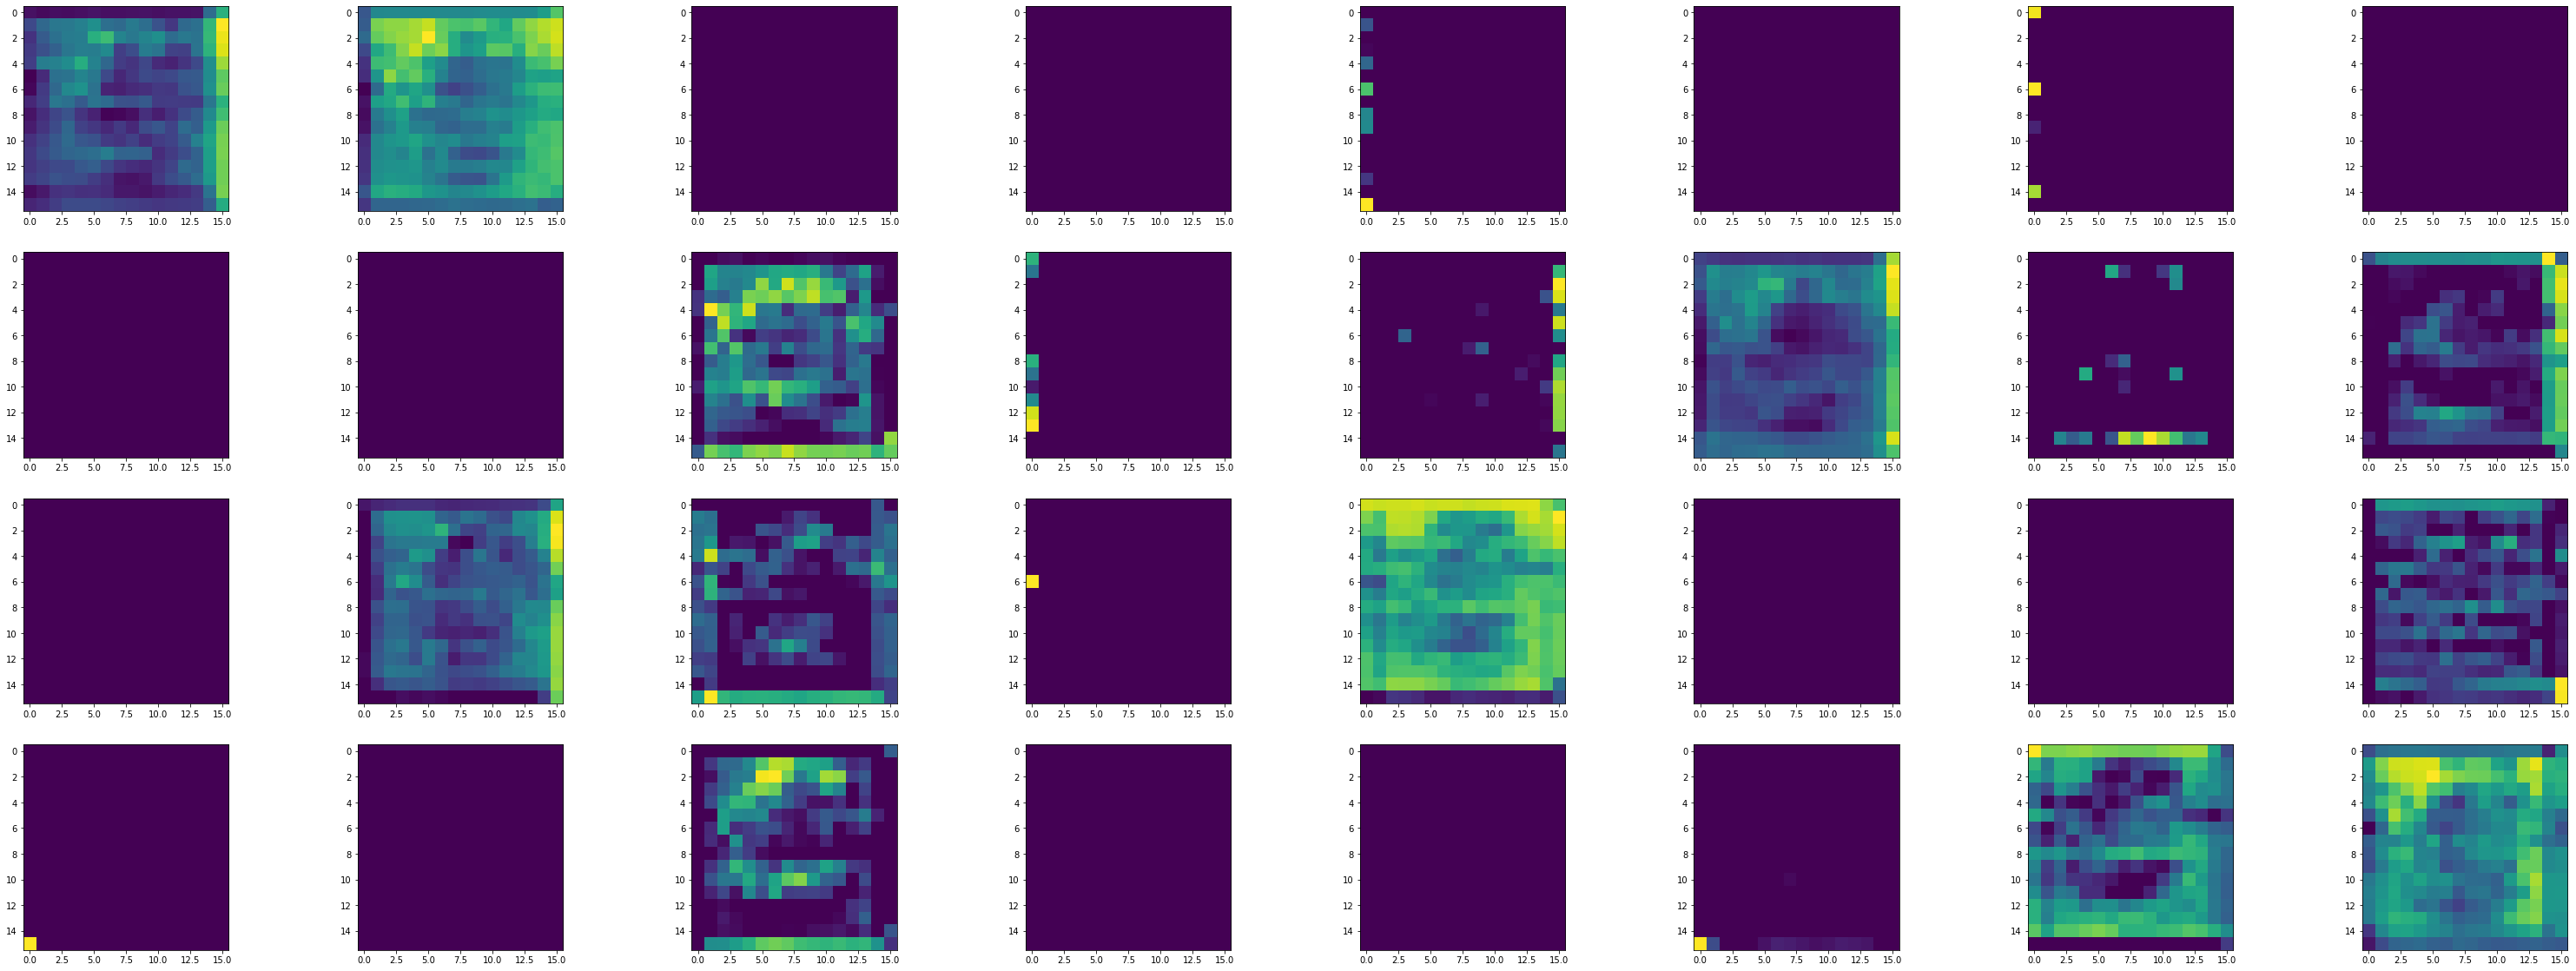

In [77]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np

layer_outputs = [layer.output for layer in model.layers]

test_image = "./data/test/test/bus/0020.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

display_activation(activations, 8, 4, 2)